<a href="https://colab.research.google.com/github/malu-fnb/Estrutura-de-Dados-Lineares-2024/blob/main/4AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Participantes:

Eduardo Costa Braga           / 00000848640

Henrique Franca Alves de Lima / 00000848801

Isabela Medeiros Belo Lopes   / 00000848820

Júlia Saldanha Vilar          / 00000848900

Júlia Vilela Cintra Galvão    / 00000849304

Malu de Faria Neves Bezerra   / 00000849553

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import Polynomial

In [ ]:
np.random.seed(0)
x = np.sort(np.random.rand(100) * 10)
y = 2 * x + 3 + np.random.randn(100)

In [ ]:
def plot_results(x, x_refined, y, y_refined, title):
    plt.scatter(x, y, color='blue', label='Dados Originais')
    plt.plot(x_refined, y_refined, color='red', label='Ajuste')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [ ]:
def RegressaoLinear(x, y):
    b1 = 0
    b0 = 0

    taxa = 0.00001
    iteracoes = 10000

    n = len(x)

    for _ in range(iteracoes):
        y_pred = b0 + b1 * x
        erro = y - y_pred
        b0 -= -2 * taxa * np.sum(erro) / n
        b1 -= -2 * taxa * np.sum(erro * x) / n

    y_linear_pred = b0 + b1 * x

    print(f'Coeficiente beta 0 (intercepto): {b0}')
    print(f'Coeficiente beta 1 (inclinação): {b1}')

    plot_results(x, x, y, y_linear_pred, "Ajuste Linear com Gradiente Descendente")


In [ ]:
def RegressaoQuadratica(x, y):
    b0 = 0
    b1 = 0
    b2 = 0

    taxa = 0.00001
    iteracoes = 10000

    n = len(x)

    for _ in range(iteracoes):
        y_pred = b0 + b1 * x + b2 * x**2
        erro = y - y_pred
        b0 -= -2 * taxa * np.sum(erro) / n
        b1 -= -2 * taxa * np.sum(erro * x) / n
        b2 -= -2 * taxa * np.sum(erro * x**2) / n

    y_quadratic_pred = b0 + b1 * x + b2 * x**2

    print(f'Coeficiente beta 2 (x^2) : {b2}')
    print(f'Coeficiente beta 1 (x): {b1}')
    print(f'Coeficiente beta 0 (constante): {b0}')

    plot_results(x, x, y, y_quadratic_pred, "Ajuste Quadrático com Gradiente Descendente")

In [ ]:
def PolinomioInterpoladorVandermonde(x, y):
  pontos_dados = np.column_stack((x,y))
  n = pontos_dados.shape[0]
  A_van = np.zeros((n,n))

  for j in range(n):
    A_van[:,j] = pontos_dados[:, 0]**(n-1-j)

  b_van = pontos_dados[:,1]
  coef = np.linalg.solve(A_van,b_van)

  x_refined = np.linspace(min(x), max(x), len(x) * 100)
  y_refined = sum(coef[j] * x_refined**(n-1-j) for j in range(n))

  plot_results(x, x_refined, y, y_refined, "Polinômio Interpolador por Vandermonde")

Coeficiente beta 0 (intercepto): 0.5372654873255104
Coeficiente beta 1 (inclinação): 2.390500192432931


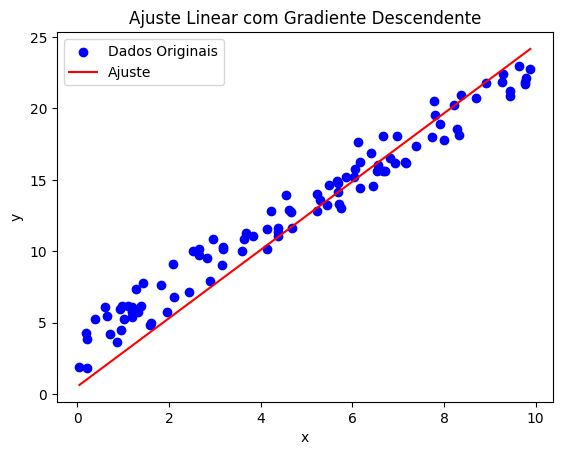

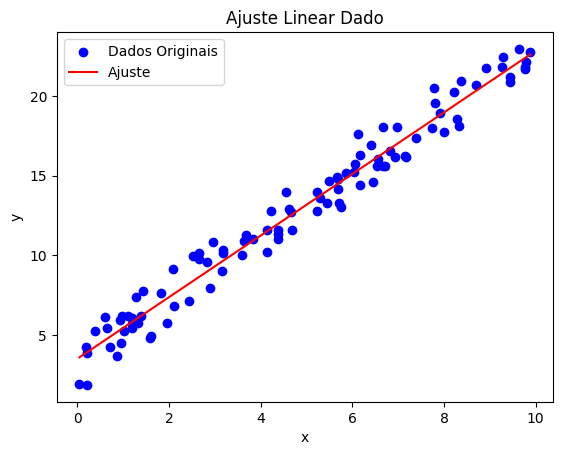

In [ ]:
RegressaoLinear(x, y)

# Função pronta
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1, 1), y)
y_linear_pred = linear_model.predict(x.reshape(-1, 1))
plot_results(x, x, y, y_linear_pred, 'Ajuste Linear Dado')

Coeficiente beta 2 (x^2) : 0.15689899313051775
Coeficiente beta 1 (x): 1.1052631262412964
Coeficiente beta 0 (constante): 0.5260807437963128


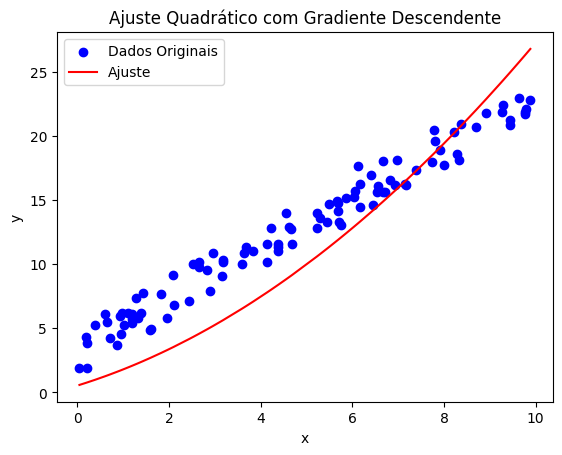

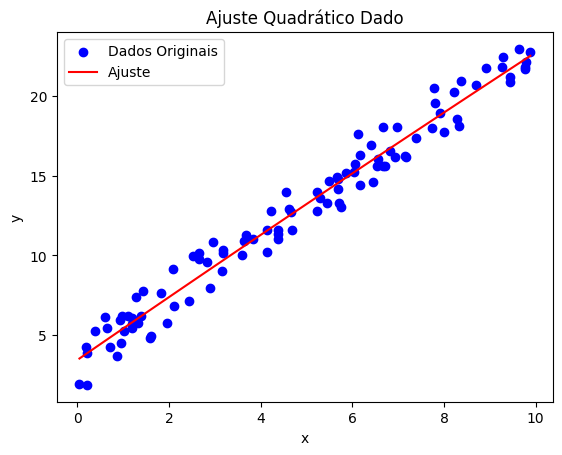

In [ ]:
RegressaoQuadratica(x, y)

# Função pronta
coefs_quadratic = np.polyfit(x, y, 2)
y_quadratic_pred = np.polyval(coefs_quadratic, x)
plot_results(x, x, y, y_quadratic_pred, 'Ajuste Quadrático Dado')

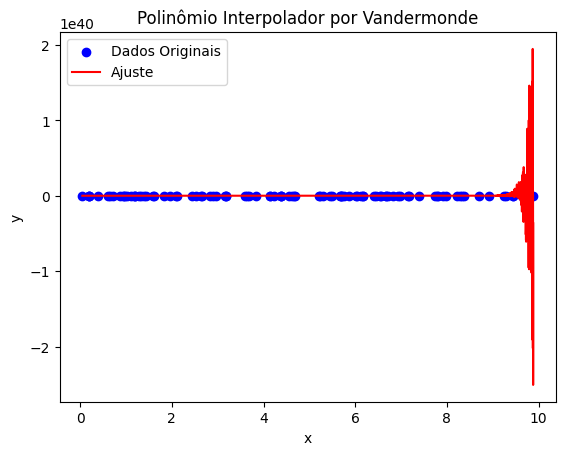

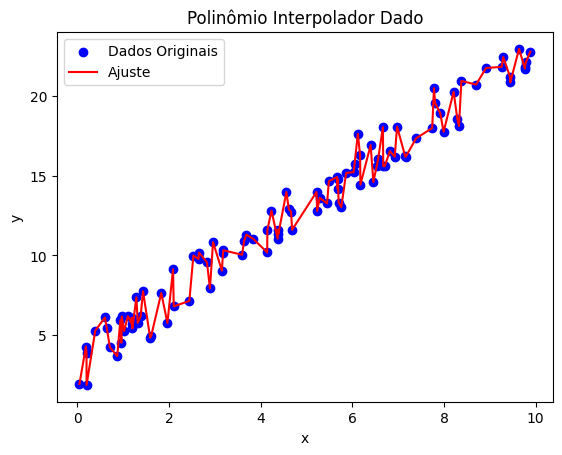

In [ ]:
PolinomioInterpoladorVandermonde(x, y)

# Função pronta
polynomial_interp = interpolate.BarycentricInterpolator(x, y)
y_poly_interp_pred = polynomial_interp(x)
plot_results(x, x, y, y_poly_interp_pred, 'Polinômio Interpolador Dado')